In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

np.random.seed(0)

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1234)

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

(54000, 28, 28) (54000,)
(10000, 28, 28) (10000,)
(6000, 28, 28) (6000,)


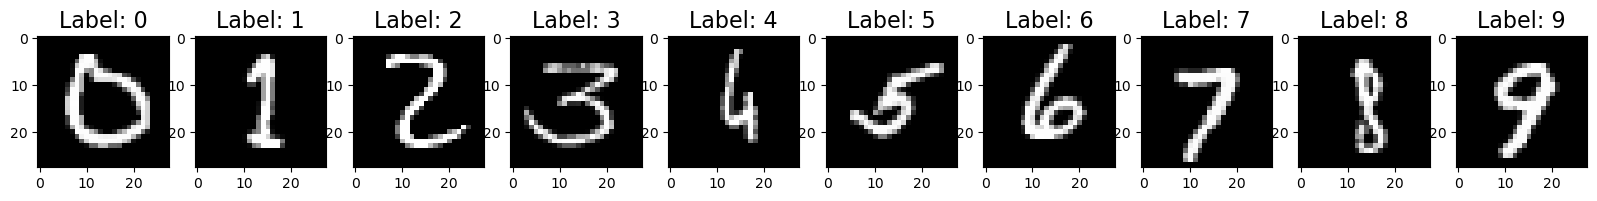

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [6]:
for i in range(10):
  print(y_train[i])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_valid = x_valid / 255.0

In [8]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_valid = x_valid.reshape(x_valid.shape[0], -1)
print(x_train.shape)

(54000, 784)


In [42]:
earlyStopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)

In [82]:
del history

In [83]:
model = Sequential([
    Dense(units=256, input_shape=(784,), activation='relu'),
    Dropout(0.2),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 256)               200960    
                                                                 
 dropout_40 (Dropout)        (None, 256)               0         
                                                                 
 dense_59 (Dense)            (None, 128)               32896     
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=64,
                    epochs=100,
                    callbacks=earlyStopping,
                    validation_data = (x_valid, y_valid),
                    verbose=2)

Epoch 1/100
844/844 - 3s - loss: 0.3083 - accuracy: 0.9079 - val_loss: 0.1381 - val_accuracy: 0.9565 - 3s/epoch - 3ms/step
Epoch 2/100
844/844 - 2s - loss: 0.1346 - accuracy: 0.9597 - val_loss: 0.1059 - val_accuracy: 0.9662 - 2s/epoch - 2ms/step
Epoch 3/100
844/844 - 2s - loss: 0.0995 - accuracy: 0.9693 - val_loss: 0.0837 - val_accuracy: 0.9738 - 2s/epoch - 2ms/step
Epoch 4/100
844/844 - 2s - loss: 0.0791 - accuracy: 0.9748 - val_loss: 0.0794 - val_accuracy: 0.9758 - 2s/epoch - 2ms/step
Epoch 5/100
844/844 - 2s - loss: 0.0646 - accuracy: 0.9790 - val_loss: 0.0721 - val_accuracy: 0.9777 - 2s/epoch - 2ms/step
Epoch 6/100
844/844 - 2s - loss: 0.0600 - accuracy: 0.9813 - val_loss: 0.0778 - val_accuracy: 0.9748 - 2s/epoch - 2ms/step
Epoch 7/100
844/844 - 2s - loss: 0.0518 - accuracy: 0.9839 - val_loss: 0.0773 - val_accuracy: 0.9758 - 2s/epoch - 2ms/step
Epoch 8/100
844/844 - 2s - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0653 - val_accuracy: 0.9805 - 2s/epoch - 2ms/step
Epoch 9/100
844/

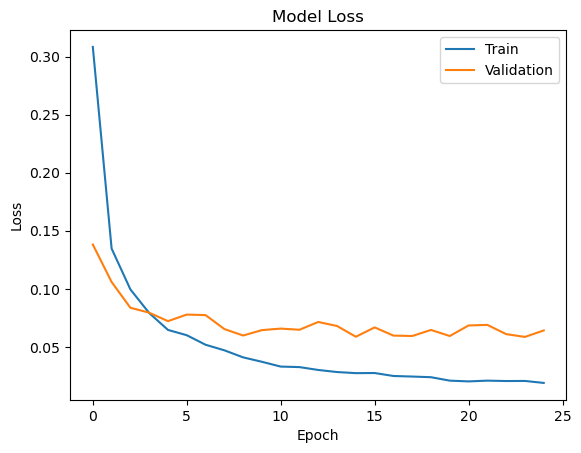

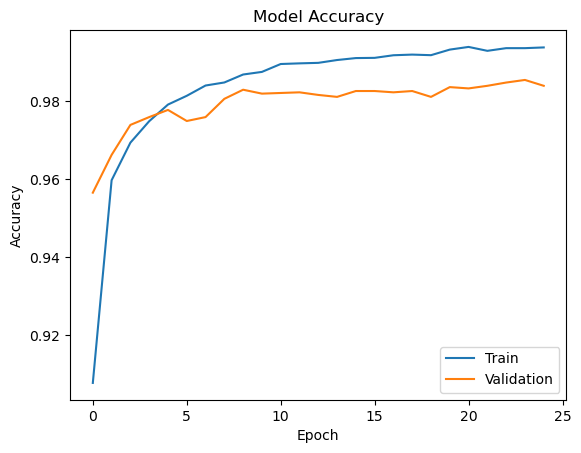

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [86]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 954us/step - loss: 0.0685 - accuracy: 0.9824
Test Loss: 0.06845278292894363, Test Accuracy: 0.9824000000953674


In [87]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 914us/step
[[2.5572963e-13 1.7622418e-09 1.3987976e-08 ... 1.0000000e+00
  3.2270595e-12 2.6529368e-09]
 [1.6461158e-12 3.6578665e-09 1.0000000e+00 ... 4.1604233e-12
  5.9076841e-09 5.1902378e-20]
 [1.5167036e-10 9.9999642e-01 3.2840362e-07 ... 3.1080783e-06
  8.8307601e-09 1.8149706e-12]
 ...
 [1.0422456e-16 1.4518909e-13 1.8153517e-15 ... 5.8588065e-12
  1.1566406e-14 1.1032076e-09]
 [3.9021453e-15 4.6417876e-14 2.7558023e-18 ... 3.6473359e-11
  1.1408143e-08 2.5701055e-15]
 [6.1274325e-13 9.9903640e-14 5.8429962e-11 ... 8.3204533e-16
  5.1777406e-12 2.1641869e-16]]
[7 2 1 ... 4 5 6]


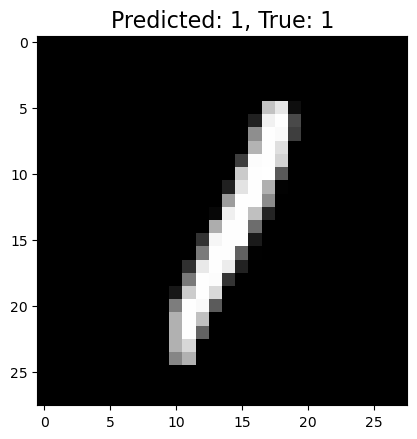

In [88]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title(f"Predicted: {y_sample_pred_class}, True: {y_sample_true}", fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

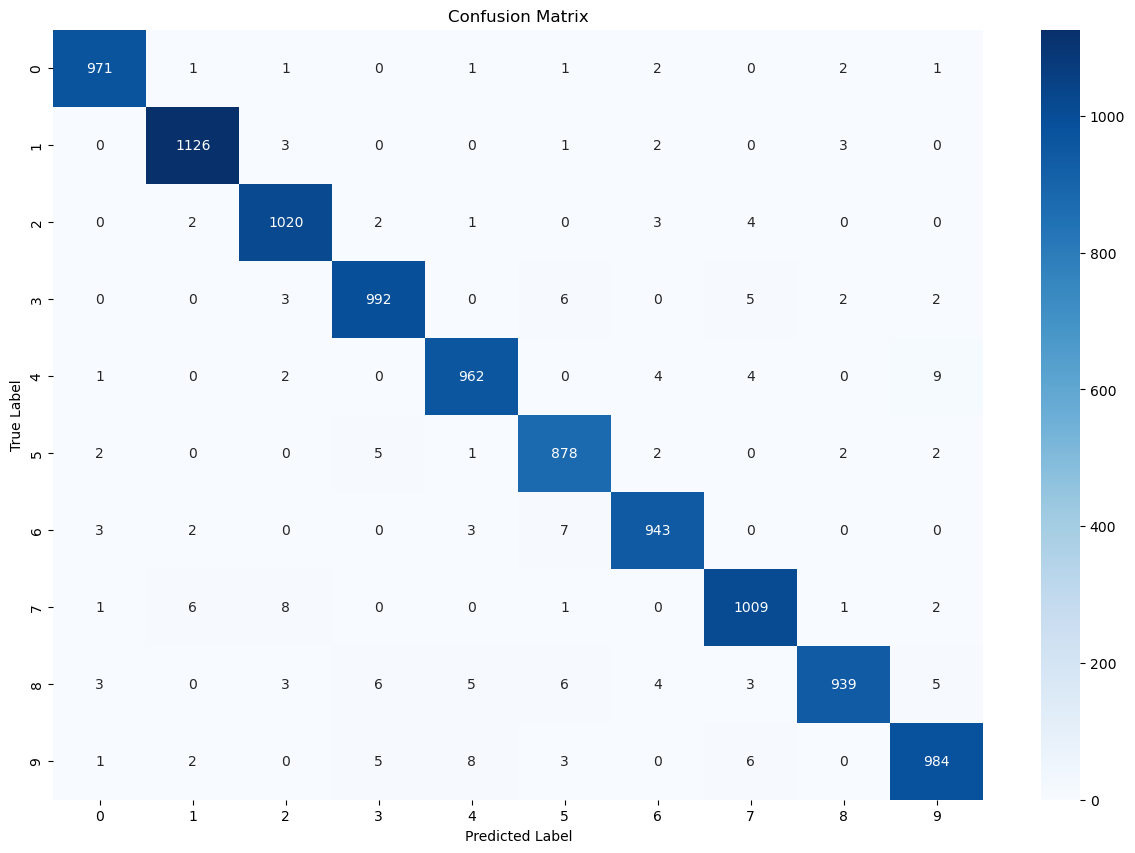

In [89]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [90]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [91]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

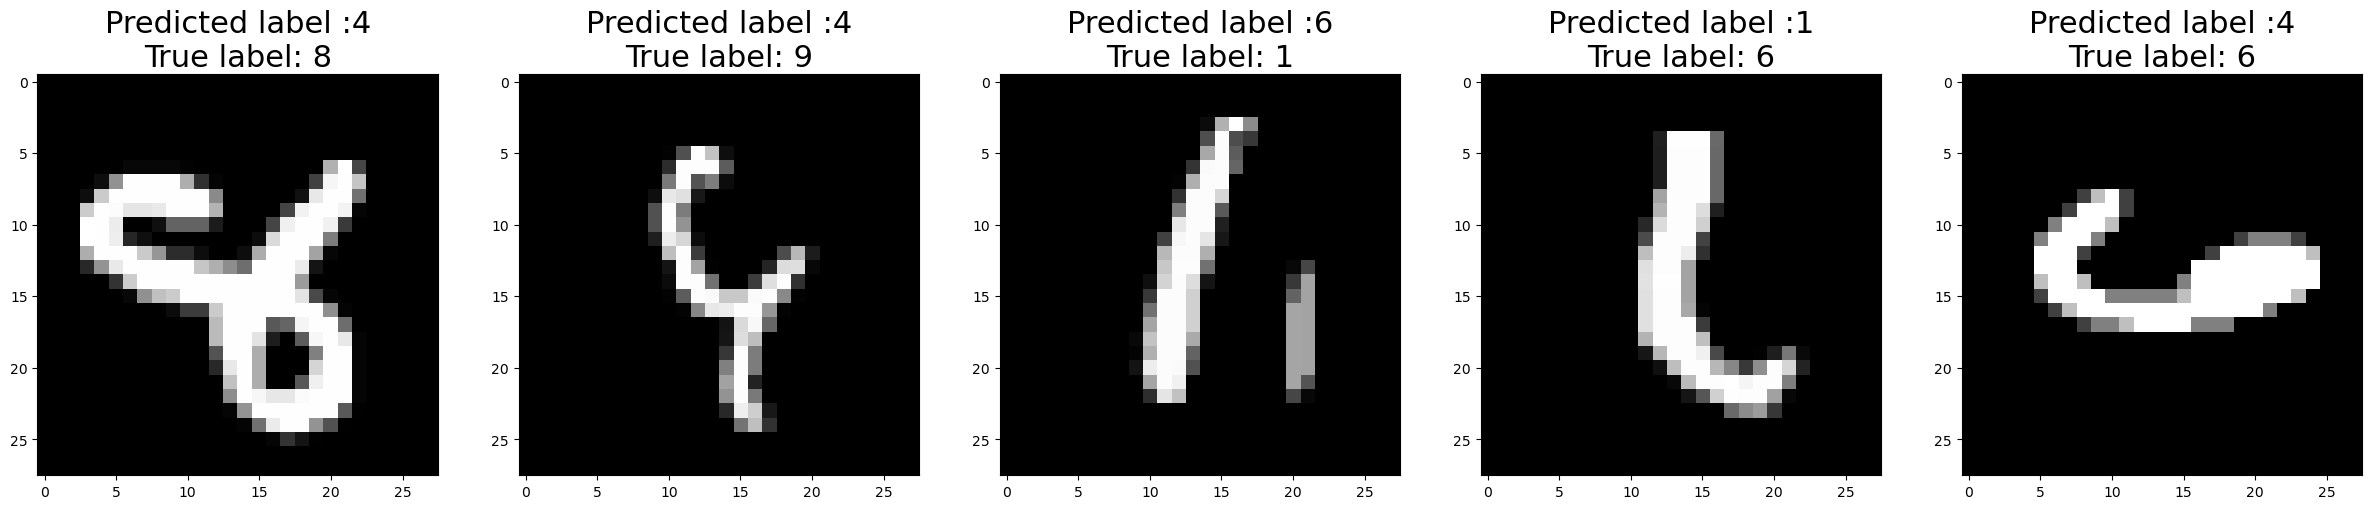

In [92]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"Predicted label :{y_p}\nTrue label: {y_t}", fontsize=22)